[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.2 Szenarien-Residuallast


In [16]:
# OPTIONAL: Load the "autoreload" extension so that code can change
import config
import matplotlib.pyplot as plt
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded

FLUCCOplus.notebooks loaded!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from FLUCCOplus.notebooks import *



In [ ]:
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.scenarios import Scenario, Names

base_year = 2018 # 2015,2016, 2017, 2018, 2019
scenario_name = Names.flucco_2050_vol
scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)


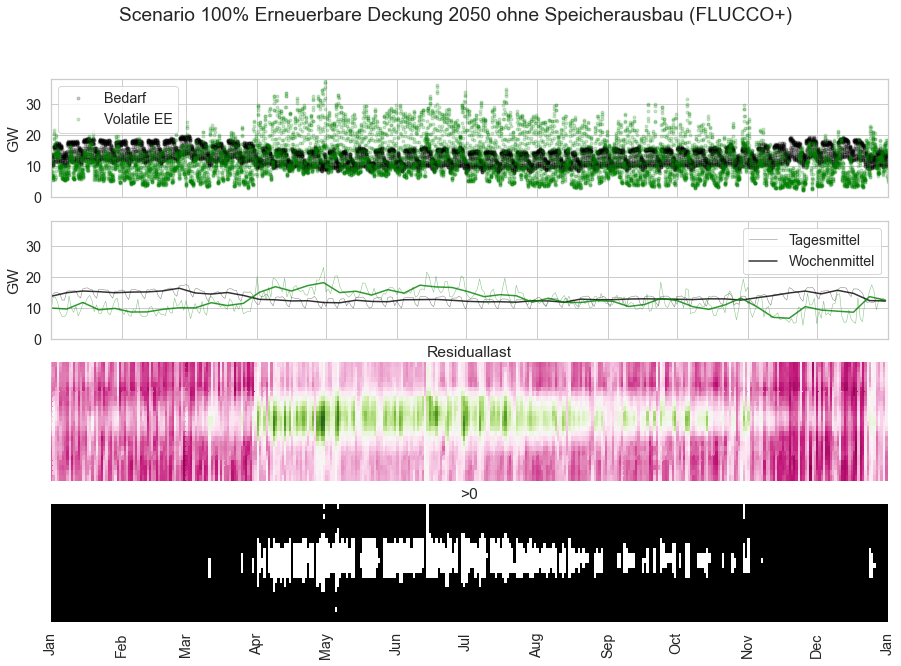

In [100]:
scenario.reset()
fig, ax = scenario.plot()

plt.savefig(config.PLOTS / "Lineares_Szenario.png", dpi=300)

<AxesSubplot:xlabel='datetime'>

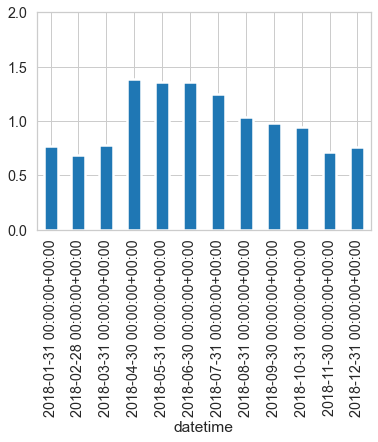

In [61]:
scenario.plot_monthly_mismatch()

<AxesSubplot:>

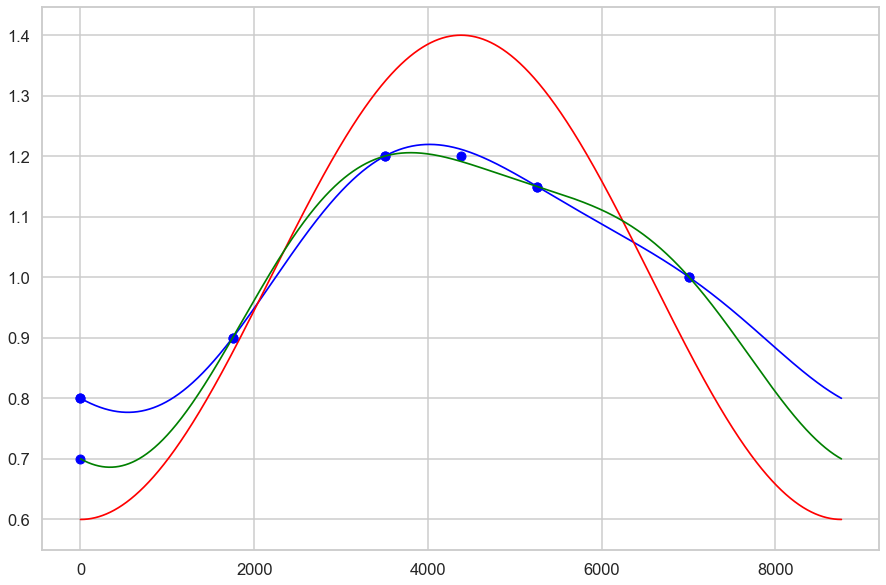

In [103]:
import FLUCCOplus.transform as traffo
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
fig,ax = plt.subplots(1,1, figsize = (15,10))
saisonale_speicher1.plot(ax=ax, line_color="blue")
saisonale_speicher2.plot(ax=ax, line_color="red")
saisonale_speicher3.plot(ax=ax, line_color="green")

config  loaded!
FLUCCOplus.config  loaded!
config  loaded!
FLUCCOplus.config  loaded!


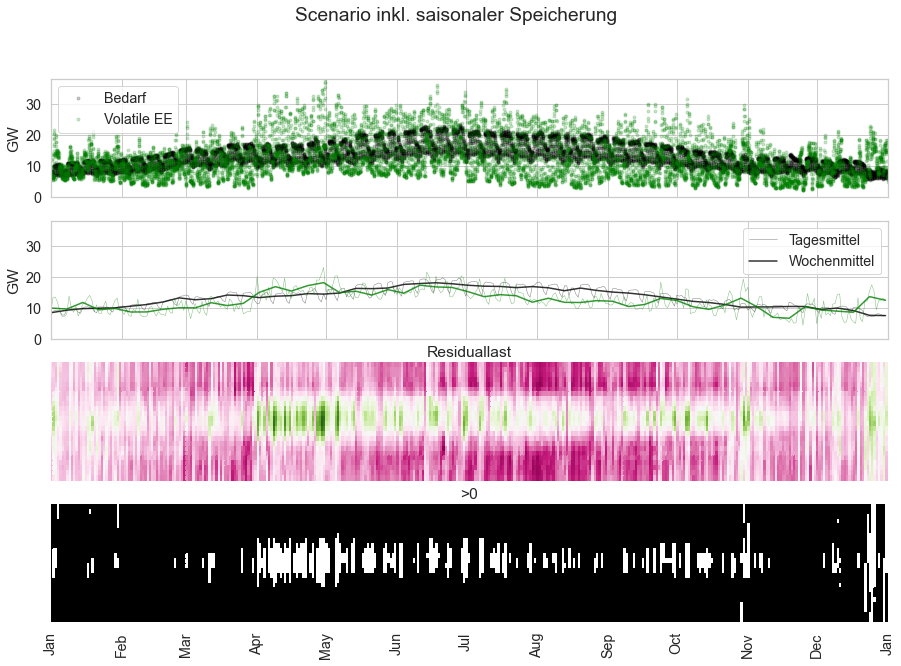

In [99]:
scenario.reset()
scenario.apply([saisonale_speicher2], reset=True)
fig, ax = scenario.plot()
fig.suptitle("Scenario inkl. saisonaler Speicherung");
plt.savefig(config.PLOTS / "Speicherszenario.png", dpi=300)

In [74]:

scenario.define_signal("RES0", separator=0.45)


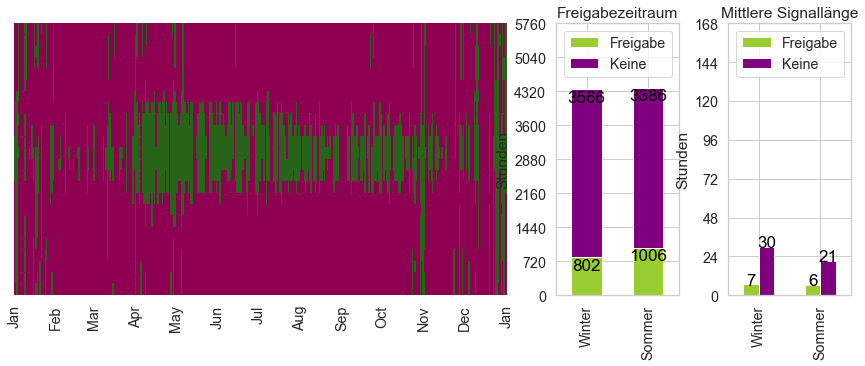

In [82]:
scenario.plot_signal();

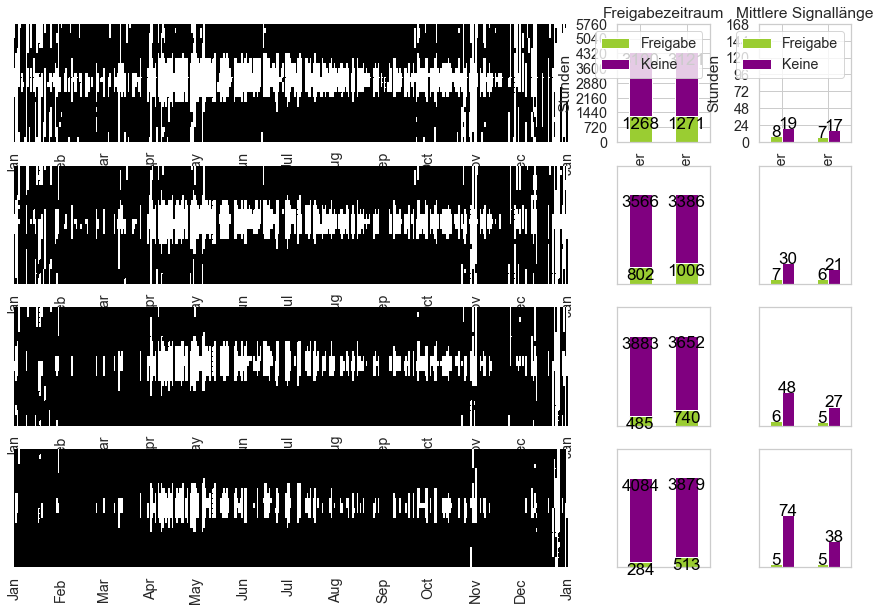

In [97]:
cutoffs = [0.4,0.45,0.5,0.55]

fig, ax = plt.subplots(4,3, figsize=(15,10), gridspec_kw={'width_ratios':[6,1,1]})
signals = pd.DataFrame()

for i, c in enumerate(cutoffs):
    scenario.define_signal("RES0", separator=c)
    scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
    signals[f"{c*100} %"] = scenario.signal

In [26]:
signals.to_csv(config.DATA_INTERIM / "RES0-40-55.csv", sep=";", decimal=",")

True

In [27]:

scenario2 = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)


C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
